<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/equation_of_circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Circle Equation Predictor (Leaky ReLU Version)
import numpy as np
import pandas as pd
import tensorflow as tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. DATA GENERATION (1 Million Rows)
# ---------------------------------------------------------
print("Generating Dataset...")
N_SAMPLES = 1_000_000

# Generate r and x
r = np.random.uniform(0.1, 15, N_SAMPLES)
scale_factor = np.random.uniform(-1, 1, N_SAMPLES)
x = r * scale_factor

# Calculate Target y (Absolute value / Top semi-circle)
y = np.sqrt(r**2 - x**2)

df = pd.DataFrame({'x': x, 'r': r, 'y': y})
X_data = df[['x', 'r']].values
y_data = df['y'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Generating Dataset...
Training Data Shape: (800000, 2)
Testing Data Shape: (200000, 2)


In [2]:
# ---------------------------------------------------------
# 2. MODEL ARCHITECTURE (Using Leaky ReLU)
# ---------------------------------------------------------
# note: In Keras, LeakyReLU is a 'layer', not just a string parameter.

model = keras.Sequential([
    layers.Input(shape=(2,)),

    # Hidden Layer 1
    layers.Dense(256),
    layers.LeakyReLU(alpha=0.1), # alpha is the slope for negative values
    layers.BatchNormalization(),

    # Hidden Layer 2 (Wide)
    layers.Dense(512),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.1),

    # Hidden Layer 3
    layers.Dense(512),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.1),

    # Hidden Layer 4
    layers.Dense(256),
    layers.LeakyReLU(alpha=0.1),

    # Hidden Layer 5
    layers.Dense(128),
    layers.LeakyReLU(alpha=0.1),

    # Hidden Layer 6
    layers.Dense(64),
    layers.LeakyReLU(alpha=0.1),

    # Output Layer (Linear is still best for the final regression output)
    layers.Dense(1, activation='linear')
])

# Using a slightly lower learning rate because Leaky ReLU is more sensitive
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 568,577 (2.17 MB)

 Trainable params: 568,065 (2.17 MB)

 Non-trainable params: 512 (2.00 KB)

In [3]:
# ---------------------------------------------------------
# 3. TRAINING
# ---------------------------------------------------------
print("\nStarting Training with Leaky ReLU...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=50,
    verbose=1
)


Starting Training with Leaky ReLU...
Epoch 1/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.1628 - mean_absolute_error: 0.5534 - val_loss: 0.2669 - val_mean_absolute_error: 0.4207
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.1962 - mean_absolute_error: 0.3229 - val_loss: 0.1273 - val_mean_absolute_error: 0.2756
Epoch 3/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.1597 - mean_absolute_error: 0.2890 - val_loss: 0.1740 - val_mean_absolute_error: 0.3298
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.1431 - mean_absolute_error: 0.2708 - val_loss: 0.0052 - val_mean_absolute_error: 0.0509
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.1140 - mean_absolute_error: 0.2402 - val_loss: 0.0261 - val_mean_absolute_error: 0.1254
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0923 - mean_absolute_error: 0.2163 - val_loss: 0.1495 - val_mean_absolute_error: 0.3016
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13


Final Test MAE: 0.0810
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


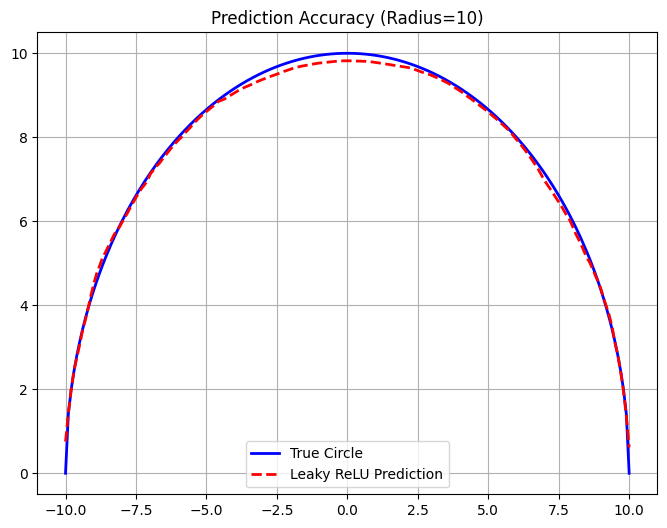

In [4]:
# ---------------------------------------------------------
# 4. EVALUATION
# ---------------------------------------------------------
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test MAE: {mae:.4f}")

# Visualization Check
test_r = 10
test_x = np.linspace(-test_r, test_r, 200)
true_y = np.sqrt(test_r**2 - test_x**2)
test_inputs = np.column_stack((test_x, np.full_like(test_x, test_r)))
pred_y = model.predict(test_inputs).flatten()

plt.figure(figsize=(8, 6))
plt.plot(test_x, true_y, 'b-', linewidth=2, label='True Circle')
plt.plot(test_x, pred_y, 'r--', linewidth=2, label='Leaky ReLU Prediction')
plt.title(f'Prediction Accuracy (Radius={test_r})')
plt.legend()
plt.grid(True)
plt.show()

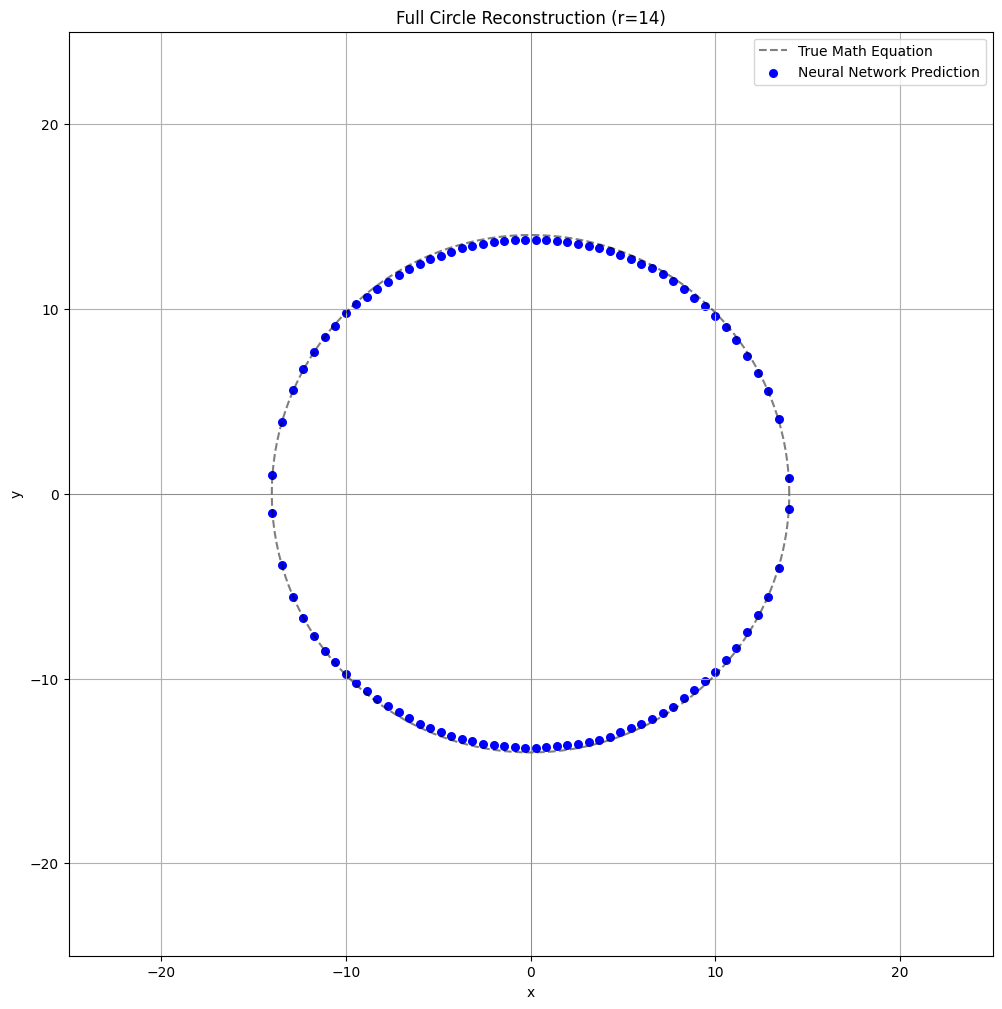

In [15]:
# ---------------------------------------------------------
# 5. FULL CIRCLE VISUALIZATION
# ---------------------------------------------------------
import matplotlib.pyplot as plt

# 1. Setup specific test values
radius_to_plot = 14     # Let's try r = 12
num_points = 50           # User requested 50 values
x_values = np.linspace(-radius_to_plot, radius_to_plot, num_points)

# 2. Prepare inputs for the model
# We create a list of [x, r] pairs
input_pairs = np.column_stack((x_values, np.full_like(x_values, radius_to_plot)))

# 3. Get Model Predictions (Absolute y)
pred_y_abs = model.predict(input_pairs, verbose=0).flatten()

# 4. Create +y and -y points
# We combine the positive and negative y values to make the full circle
all_x = np.concatenate([x_values, x_values])
all_y = np.concatenate([pred_y_abs, -pred_y_abs])

# 5. Plotting
plt.figure(figsize=(12, 12)) # Square figure so circle doesn't look like an oval

# Plot the "True" perfect circle for comparison (dashed line)
theta = np.linspace(0, 2*np.pi, 200)
true_circle_x = radius_to_plot * np.cos(theta)
true_circle_y = radius_to_plot * np.sin(theta)
plt.plot(true_circle_x, true_circle_y, 'k--', label='True Math Equation', alpha=0.5)

# Plot the Neural Network Predictions (Blue Dots)
plt.scatter(all_x, all_y, color='blue', s=30, label='Neural Network Prediction')

plt.title(f"Full Circle Reconstruction (r={radius_to_plot})")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.xlim(-25, 25)
plt.ylim(-25, 25)

# Force the aspect ratio to be equal so the circle looks round
plt.gca().set_aspect('equal', adjustable='box')

plt.show()